## Do Left Handers Die Younger than Right Handers?

I look to answer this question using probability approach. I specifically use the Bayer's Theorem to solve this question.

We require 2 datasets that are of importance to solve this question:
    
1) Percentage of left and right handed people in the population

2) Data related to deaths distributed by the ages

The dataset used is from back in 1990s, when a survey conducted for the rate of left-handedness was published in this <a href="https://pubmed.ncbi.nlm.nih.gov/1528408/">paper</a>. 

The death distribution data comes from the CDC site at - https://www.cdc.gov/nchs/data/statab/vs00199_table310.pdf.

<b>Both these datasets are available at https://gist.github.com/mbonsma/</b>

### 1. Import the left handedness data and analyze/visualize it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data
lefthandedbyage = pd.read_csv("datasets/lh_data.csv")

In [3]:
lefthandedbyage.head()

,Age,Male,Female
0,10,12.717558,12.198041
1,11,15.318830,11.144804
2,12,14.808281,11.549240
3,13,13.793744,11.276442
4,14,15.156304,11.572906


In [4]:
lefthandedbyage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     77 non-null     int64  
 1   Male    77 non-null     float64
 2   Female  77 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.9 KB


In [5]:
lefthandedbyage.describe()

,Age,Male,Female
count,77.000000,77.000000,77.000000
mean,48.000000,11.549122,9.120522
std,22.371857,3.138912,2.505480
min,10.000000,4.885999,4.680948
25%,29.000000,8.562868,6.604398
50%,48.000000,12.717558,9.892073
75%,67.000000,14.209302,11.368353
max,86.000000,15.546784,12.872166


Text(0, 0.5, 'Percentage of people who are left-handed')

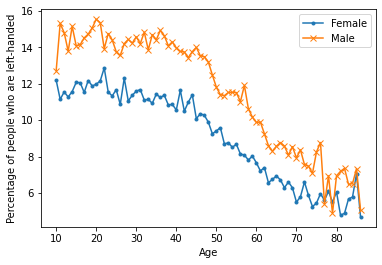

In [6]:
# plot the dataset
fig, ax = plt.subplots()
ax.plot('Age', 'Female', data = lefthandedbyage, marker = '.')
ax.plot('Age', 'Male', data = lefthandedbyage, marker = 'x')
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Percentage of people who are left-handed")

In [7]:
# create a new column for the average of male and female
lefthandedbyage['Average'] = lefthandedbyage[['Female', 'Male']].mean(axis = 1)

In [8]:
lefthandedbyage.head()

,Age,Male,Female,Average
0,10,12.717558,12.198041,12.457800
1,11,15.318830,11.144804,13.231817
2,12,14.808281,11.549240,13.178760
3,13,13.793744,11.276442,12.535093
4,14,15.156304,11.572906,13.364605


Text(0, 0.5, 'Percentage of people who are left-handed')

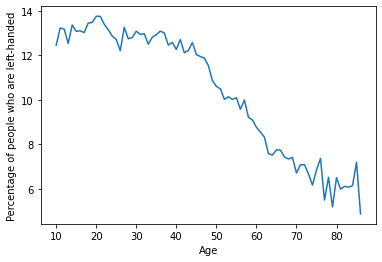

In [9]:
fig, ax = plt.subplots()
ax.plot('Age', 'Average', data = lefthandedbyage)
ax.set_xlabel("Age")
ax.set_ylabel("Percentage of people who are left-handed")

### 2. Import the death distribution data and analyze/visualize it

In [10]:
deathbyage = pd.read_csv("datasets/cdc_vs00199_table310.tsv", sep = '\t', skiprows = [1])

In [11]:
deathbyage.head()

,Age,Both Sexes,Male,Female
0,0,27937.0,15646.0,12291.0
1,1,1989.0,1103.0,886.0
2,2,1376.0,797.0,579.0
3,3,1046.0,601.0,445.0
4,4,838.0,474.0,364.0


In [12]:
deathbyage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         125 non-null    int64  
 1   Both Sexes  120 non-null    float64
 2   Male        115 non-null    float64
 3   Female      120 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.0 KB


In [13]:
deathbyage.describe()

,Age,Both Sexes,Male,Female
count,125.000000,120.000000,115.000000,120.000000
mean,62.000000,19925.358333,10218.982609,10132.166667
std,36.228442,23523.773527,11183.006921,13081.181052
min,0.000000,1.000000,1.000000,1.000000
25%,31.000000,1733.250000,1067.000000,816.250000
50%,62.000000,8933.500000,5401.000000,3708.500000
75%,93.000000,31112.500000,15576.000000,14745.500000
max,124.000000,73039.000000,36020.000000,42335.000000


Text(0, 0.5, 'Percentage of people who are left-handed')

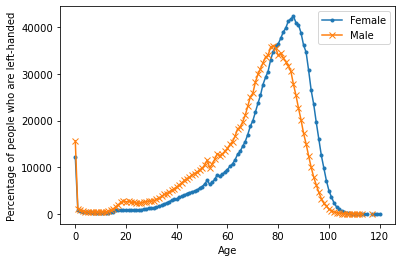

In [14]:
fig, ax = plt.subplots()
ax.plot('Age', 'Female', data = deathbyage, marker = '.')
ax.plot('Age', 'Male', data = deathbyage, marker = 'x')
ax.legend() # add a legend
ax.set_xlabel("Age")
ax.set_ylabel("Percentage of people who are left-handed")

Drop the first row since the total is not needed

In [15]:
deathbyage = deathbyage.drop(index= deathbyage.index[0], axis = 0)

In [16]:
deathbyage.rename(columns={"Both Sexes" : "Deaths"}, inplace = True)

In [17]:
deathbyage

,Age,Deaths,Male,Female
1,1,1989.0,1103.0,886.0
2,2,1376.0,797.0,579.0
3,3,1046.0,601.0,445.0
4,4,838.0,474.0,364.0
5,5,763.0,446.0,317.0
...,...,...,...,...
120,120,1.0,NaN,1.0
121,121,NaN,NaN,NaN
122,122,NaN,NaN,NaN
123,123,NaN,NaN,NaN


We are concered with the total number and not gender-wise, hence drop those columns

In [18]:
deathbyage.drop(['Male', 'Female'], axis = 1, inplace = True)

Drop NaN values from the Deaths columns







In [19]:
deathbyage = deathbyage.dropna(subset = ["Deaths"])

In [20]:
deathbyage

,Age,Deaths
1,1,1989.0
2,2,1376.0
3,3,1046.0
4,4,838.0
5,5,763.0
...,...,...
115,115,3.0
117,117,3.0
118,118,1.0
119,119,2.0


Text(0, 0.5, 'Number of people who died')

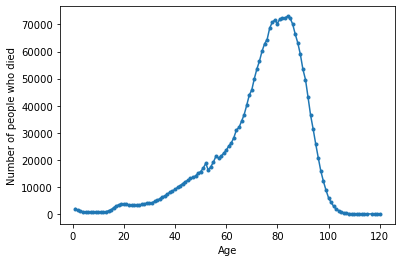

In [21]:
# total number of people who died as a function of age
fig, ax = plt.subplots()
ax.plot('Age', 'Deaths', data = deathbyage, marker='.')
ax.set_xlabel("Age")
ax.set_ylabel("Number of people who died")

### 3. Bayes' Rule

We want to calculate the probability of dying at age A given that you are left-handed. Write this as P(A | LH). To compare this result, we also want the same quantity for right-handers: P(A | RH).

In order the calculate this probabilty, we look at the <strong>Bayes' Theorem</strong>

Bayes' theorem for the two events we care about: left-handedness (LH) and dying at age A.
<p>$$P(A | LH) = \frac{P(LH|A) P(A)}{P(LH)}$$</p>

P(LH | A) is the probability that you are left-handed <em>given that</em> you died at age A. P(A) is the overall probability of dying at age A, and P(LH) is the overall probability of being left-handed. 

I will now calculate each of these three quantities.

### 4. Probability of left handedness given age of death - P(LH | A)

The data for <code>lefthandedbyage</code> ranges from Ages 10 to 86. The <code>deathbyage</code> data ranges from ages 1 to 120. We therefore need to find the <code>lefthandedbyage</code> values for the missing ages i.e 1 to 9 and 87 to 120. I assume this rate of lefthandedness for these age groups as the mean of the last 5 and the first 5 age wise entries in the <code>lefthandedbyage</code> dataset.

For ages 10 to 86, the rate would be as given in the <code>lefthandedbyage</code> dataset. 

The required probability will then be a the corresponding rate for the age divied by 100 (since rate is given in %).

In [22]:
def P_LH_A(ages_of_death):
    
    # use the mean of the 5 neighbouring points for rates before and after the start 
    rate_before = lefthandedbyage['Average'][-5:].mean()
    rate_after = lefthandedbyage['Average'][:5].mean()
    rate_middle = lefthandedbyage.loc[lefthandedbyage['Age'].isin(ages_of_death)]['Average']
    
    youngest_age = 10 # the youngest age in the dataset is 10
    oldest_age = 86 # the oldest age in the dataset is 86
    
    P = np.zeros(ages_of_death.shape)
    
    # extract rate of left-handedness for people of age age_of_death
    P[ages_of_death > oldest_age] = rate_before / 100
    P[ages_of_death < youngest_age] = rate_after / 100
    P[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = rate_middle / 100
 
    return P

### 5. Overall probability of the person who died at X age to be left-handed - P(LH)

P(LH) is the probability that a person who died in is left-handed, assuming we know nothing else about them. This is the average left-handedness in the population of deceased people.

We can calculate it by summing up all of the left-handedness probabilities for each age, weighted with the number of deceased people at each age, then divided by the total number of deceased people to get a probability. In equation form:
<p><img src="https://i.imgur.com/gBIWykY.png" alt="equation" width="220"></p>
where N(A) is the number of people who died at age A (given by the dataframe <code>deathbyage</code>)
<!--- $$P(LH) = \frac{\sum_{\text{A}} P(LH | A) N(A)}{\sum_{\text{A}} N(A)}$$ -->

Function P_LH() calculates the overall probability of left-handedness in the population for a given study year.

Create a series by multiplying the number of dead people in the Deaths column with the probability of their being lefthanded using P_LH_A(). Get the summation of this for all ages. Finally, divide this by the total number of dead people.

In [23]:
def P_LH(deathbyage): 
    
    # sum over P_LH for each age
    p_list = P_LH_A(deathbyage['Age'])*deathbyage['Deaths']
    P = np.sum(p_list)
    P = P/np.sum(deathbyage['Deaths'])
    return P 

print(P_LH(deathbyage))

0.07372719793896641


### 6. Calcuting the main probability in question - P(A | LH)

Now I can use all three quantities: P(A), P(LH), and P(LH | A) using Bayes' Rule to get P(A | LH), the probability of being age A at death given that you are left-handed. 

To make this answer meaningful, though, I also want to compare it to P(A | RH), the probability of being age A at death given that you're right-handed.

For left-handers:

In [24]:
def P_A_LH(ages_of_death, deathbyage):
    
    P_A = deathbyage['Deaths'][ages_of_death] / np.sum(deathbyage['Deaths'])
    P_Left = P_LH(deathbyage)
    P_Left_Age = P_LH_A(ages_of_death)

    return P_Left_Age*P_A/P_Left

For right handers:

Overall probability of right-handedness P(RH) can be calcuated as 1-P(LH). Probability of being right-handed given that you died at age A, P(RH | A) is equal to 1-P(LH | A)

In [25]:
def P_A_RH(ages_of_death, deathbyage):
    
    P_A = deathbyage['Deaths'][ages_of_death] / np.sum(deathbyage['Deaths'])
    P_RH = 1 - P_LH(deathbyage)
    P_RH_A = 1 - P_LH_A(ages_of_death)
    
    return P_RH_A*P_A/P_RH

### 7. Find the concerned probabilities for all ages, for both left and right handedness

In [26]:
ages = deathbyage.Age # make a list of ages of death to plot

# for each age, calculate the probability of being left or right-handed
left_handed_probability = P_A_LH(ages, deathbyage)
right_handed_probability = P_A_RH(ages, deathbyage)

Plotting the distributions of conditional probabilities

Text(0, 0.5, 'Probability of being age A at death')

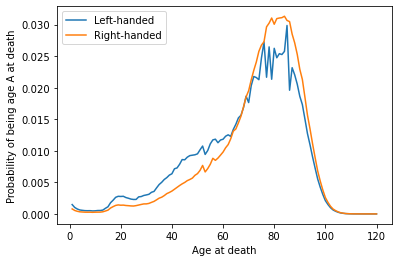

In [27]:
fig, ax = plt.subplots() # create figure and axis objects
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = "Right-handed")
ax.legend()
ax.set_xlabel("Age at death")
ax.set_ylabel("Probability of being age A at death")

### 8. Conclusion to the question

Finally we find the average age of a left-hander and a right-hander. We can do this by calculating the mean of these probability distributions in the same way I calculated P(LH) earlier, weighting the probability distribution by age and summing over the result.
<p>$$\text{Average age of left-handed people at death} = \sum_A A P(A | LH)$$</p>
<p>$$\text{Average age of right-handed people at death} = \sum_A A P(A | RH)$$</p>

In [28]:
# calculating average ages for left-handed and right-handed groups
average_lh_age =  np.nansum(ages*np.array(left_handed_probability))
average_rh_age =  np.nansum(ages*np.array(right_handed_probability))

print(average_lh_age)
print(average_rh_age)

68.78488628316178
73.57654302270602


In [29]:
print("The difference in average ages is " + str(round(average_rh_age - average_lh_age, 1)) + " years.")

The difference in average ages is 4.8 years.


### The difference in average death age of left and right handers is 4.8 years. Meaning, left-handed people seem to die 4.8 years younger than right-handed people as per the given datasets of the 1990s

We got a pretty big age gap between left-handed and right-handed people purely as a result of the changing rates of left-handedness in the population. However, the reported rates of left-handedness have increased from just 3% in the early 1900s to about 12-14% today, which means that older people are much more likely to be reported as right-handed than left-handed, and so looking at a sample of recently deceased people will have more old right-handers. Therefore, if we do the same analysis on a newer dataset of lefthandedness, the result would be an even lesser gap between the average death ages.